In [21]:
import os
import shutil
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:

# Path dataset
source_dir = "dataset_cabai"
output_dir = "dataset_split"
splits = ['train', 'val', 'test']
split_ratios = [0.7, 0.15, 0.15]  # train, val, test
valid_ext = ['.jpg', '.jpeg', '.png'] 

In [23]:
# Buat folder output
for split in splits:
    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

In [24]:
# Proses split dan penyalinan file
for class_name in os.listdir(source_dir):
    class_dir = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    # Ambil hanya file gambar
    images = [f for f in os.listdir(class_dir)
              if os.path.isfile(os.path.join(class_dir, f)) and
              os.path.splitext(f)[1].lower() in valid_ext]

    random.shuffle(images)

    total = len(images)
    train_count = round(split_ratios[0] * total)
    val_count = round(split_ratios[1] * total)
    test_count = total - train_count - val_count  # Sisa gambar ke test agar total pas

    split_data = {
        'train': images[:train_count],
        'val': images[train_count:train_count + val_count],
        'test': images[train_count + val_count:]
    }

    for split in splits:
        for img_name in tqdm(split_data[split], desc=f"{class_name} -> {split}"):
            src = os.path.join(class_dir, img_name)
            dst = os.path.join(output_dir, split, class_name, img_name)
            shutil.copy2(src, dst)

cabai_sehat -> test: 100%|██████████| 51/51 [00:00<00:00, 346.61it/s]


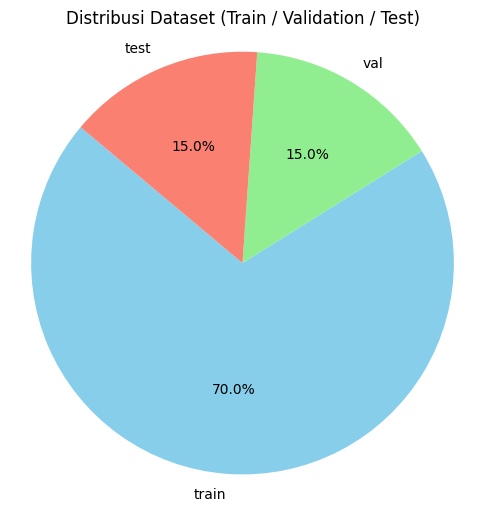


Jumlah gambar per split:
train: 714 gambar
val: 153 gambar
test: 153 gambar

Total gambar setelah split: 1020


In [ ]:
# Visualisasi
split_counts = {split: 0 for split in splits}
for split in splits:
    split_path = os.path.join(output_dir, split)
    for class_name in os.listdir(split_path):
        class_dir = os.path.join(split_path, class_name)
        files = [f for f in os.listdir(class_dir)
                 if os.path.isfile(os.path.join(class_dir, f)) and
                 os.path.splitext(f)[1].lower() in valid_ext]
        split_counts[split] += len(files)

# Pie chart
labels = list(split_counts.keys())
sizes = list(split_counts.values())
colors = ['skyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Dataset (Train / Validation / Test)')
plt.axis('equal')
plt.show()

# Print jumlah file per split
print("\nJumlah gambar per split:")
for split in splits:
    print(f"{split}: {split_counts[split]} gambar")

# Total akhir untuk validasi
total_split = sum(split_counts.values())
print(f"\nTotal gambar split: {total_split}")
